In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("nursery.data.txt")

In [3]:
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,application
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
parents        12960 non-null object
has_nurs       12960 non-null object
form           12960 non-null object
children       12960 non-null object
housing        12960 non-null object
finance        12960 non-null object
social         12960 non-null object
health         12960 non-null object
application    12960 non-null object
dtypes: object(9)
memory usage: 455.7+ KB


In [5]:
from sklearn.cross_validation import train_test_split

c:\users\nikola\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X1 = df.drop('application',axis=1)
X = X1.apply(lambda x: pd.factorize(x)[0])
X.head()

,parents,has_nurs,form,children,housing,finance,social,health
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1


In [7]:
y = df['application']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier(max_depth=5)

In [11]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

  not_recom       1.00      1.00      1.00      2202
   priority       0.81      0.84      0.82      2074
  recommend       0.00      0.00      0.00         1
 spec_prior       0.84      0.88      0.86      2037
 very_recom       0.00      0.00      0.00       166

avg / total       0.86      0.89      0.87      6480



c:\users\nikola\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
print(confusion_matrix(y_test, predictions))

[[2202    0    0    0    0]
 [   0 1746    0  328    0]
 [   0    1    0    0    0]
 [   0  250    0 1787    0]
 [   0  166    0    0    0]]


In [16]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[:-1])
features

['parents',
 'has_nurs',
 'form',
 'children',
 'housing',
 'finance',
 'social',
 'health']

In [17]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

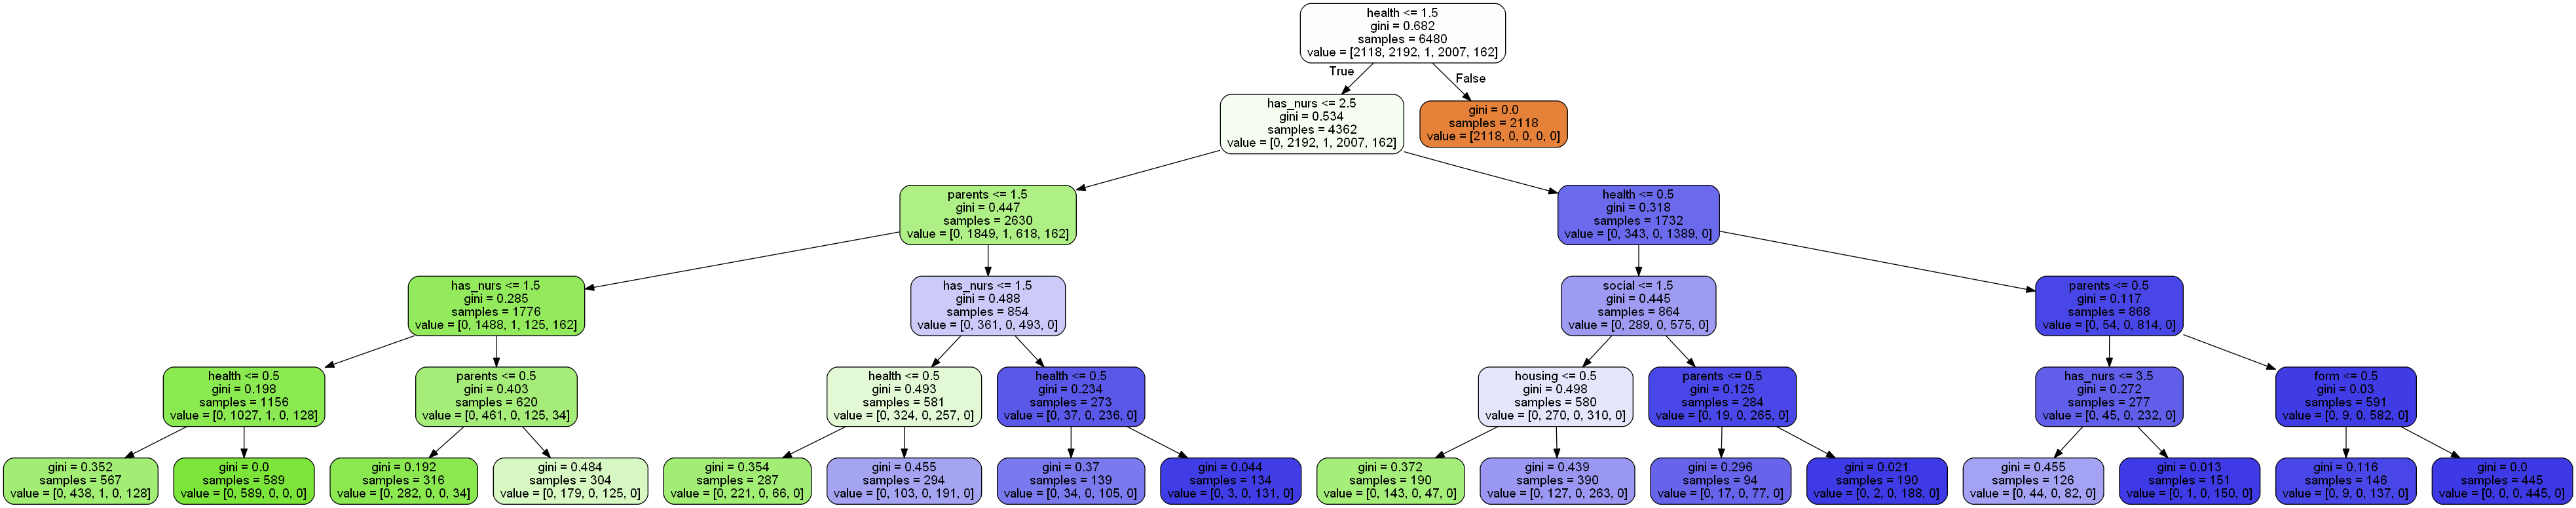

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  